## Linear Regression

Objective:
* Explain the concept of linear regression and its practical applications.
* Demonstrate how to load and analyze real-world datasets, using the real-estate dataset as an example.
* Show how to visualize data points and fit lines with basic linear regression models.
* Instruct on how to train and evaluate simple linear regression models by calculating Mean Absolute Error (MAE), R², Root Meat Square Error (RMSE), and mean square error (MSE).
* Cover regularization techniques like Ridge and Lasso to prevent overfitting.
* Tested with cross-validation to assess the reliability of model performance.s

### Table Of Contents
- 1.0 Import Libraries
- 2.0 Load and explore real estate dataset
- 3.0 Visualizing relationships between Features and target variable
- 4.0 Linear Regression models
   - 4.1 Simple Linear Regression
   - 4.2 Multiple Linear Regression
   - 4.3 Polynomial Linear Regression
   - 4.4 Advanced Linear Regression using Statmodels
- 5.0 Evaluation
- 6.0 Hyperparameter Tuning
    - 6.1 Ridge and Lasso

Linear regression is a statistical method used to model the relationship between one dependent variable (also called the target or outcome variable) and one or more independent variables (predictors or features). The goal is to find the best-fitting straight line (or hyperplane in higher dimensions) that minimizes the difference between the observed values and the predicted values.

The applications are, including:
1. **Predictive modeling**: Linear regression helps forecast outcomes, such as estimating house prices based on features like size, location, and amenities. This aids buyers and sellers in making informed decisions.

2. **Trend Analysis**: It identifies patterns, such as the relationship between marketing spend and sales, enabling companies to optimize budgets and improve revenue.



## 1.0 Import Libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, make_scorer
import statsmodels.api as sm
from math import sqrt


## 2.0 load and explore real estate dataset

In [59]:
df= pd.read_csv('Real estate.csv')

In [60]:
df.shape

(414, 8)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


There are 7 columns, all representing numeric data types. Let's have a look on the first 5 rows.

In [62]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


We want to have a look at the summary of descriptive statistics for a DataFrame's numerical columns. It is a quick way to understand the distribution and basic statistical properties of the data.

In [63]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


We can see that, transactions occurred primarily in 2013, with house ages ranging from newly built properties (0 years) to 43.8 years old, and a median age of 16.1 years. The proximity to MRT stations varies widely, from 23.38 to 6488.02, with an average distance of 1083.89, suggesting a probability of mix of properties in urban and suburban areas. The number of convenience stores nearby ranges from 0 to 10, with a median of 4, indicating varying levels of urban density across locations. The geographic coordinates (latitude and longitude) suggest the data covers a localized region, likely a city or neighborhood. House prices show significant variation, from 7.6 to 117.5 per unit area, with a mean of 37.98 and a standard deviation of 13.61.

Before building any predictive models, it is necessary to clean the dataset first, such as removing duplicates, null values. We will first proceed to check for null values.

In [64]:
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

No null values are found.

Then, proceed to check for duplicated rows.

In [65]:
duplicates = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


No duplicated rows found. We proceed to check for any unnecessary columns that can be dropped.

In [66]:
df.nunique()

No                                        414
X1 transaction date                        12
X2 house age                              236
X3 distance to the nearest MRT station    259
X4 number of convenience stores            11
X5 latitude                               234
X6 longitude                              232
Y house price of unit area                270
dtype: int64

We note that there is a high number of unique values in the column 'No'. The column "No" is likely a unique identifier for each record and does not contain any meaningful information, hence, we will drop it.

In [67]:
df = df.drop(columns=['No'])

Rechecking columns again to make sure it is dropped.

In [68]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [69]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## 3.0 Visualizing relationships between Features and target variable

We start by plotting a series of scatterplots with regression lines, showing the relationships between each feature in the dataset and the target variable. The target variable is 'Y house price of unit area'.

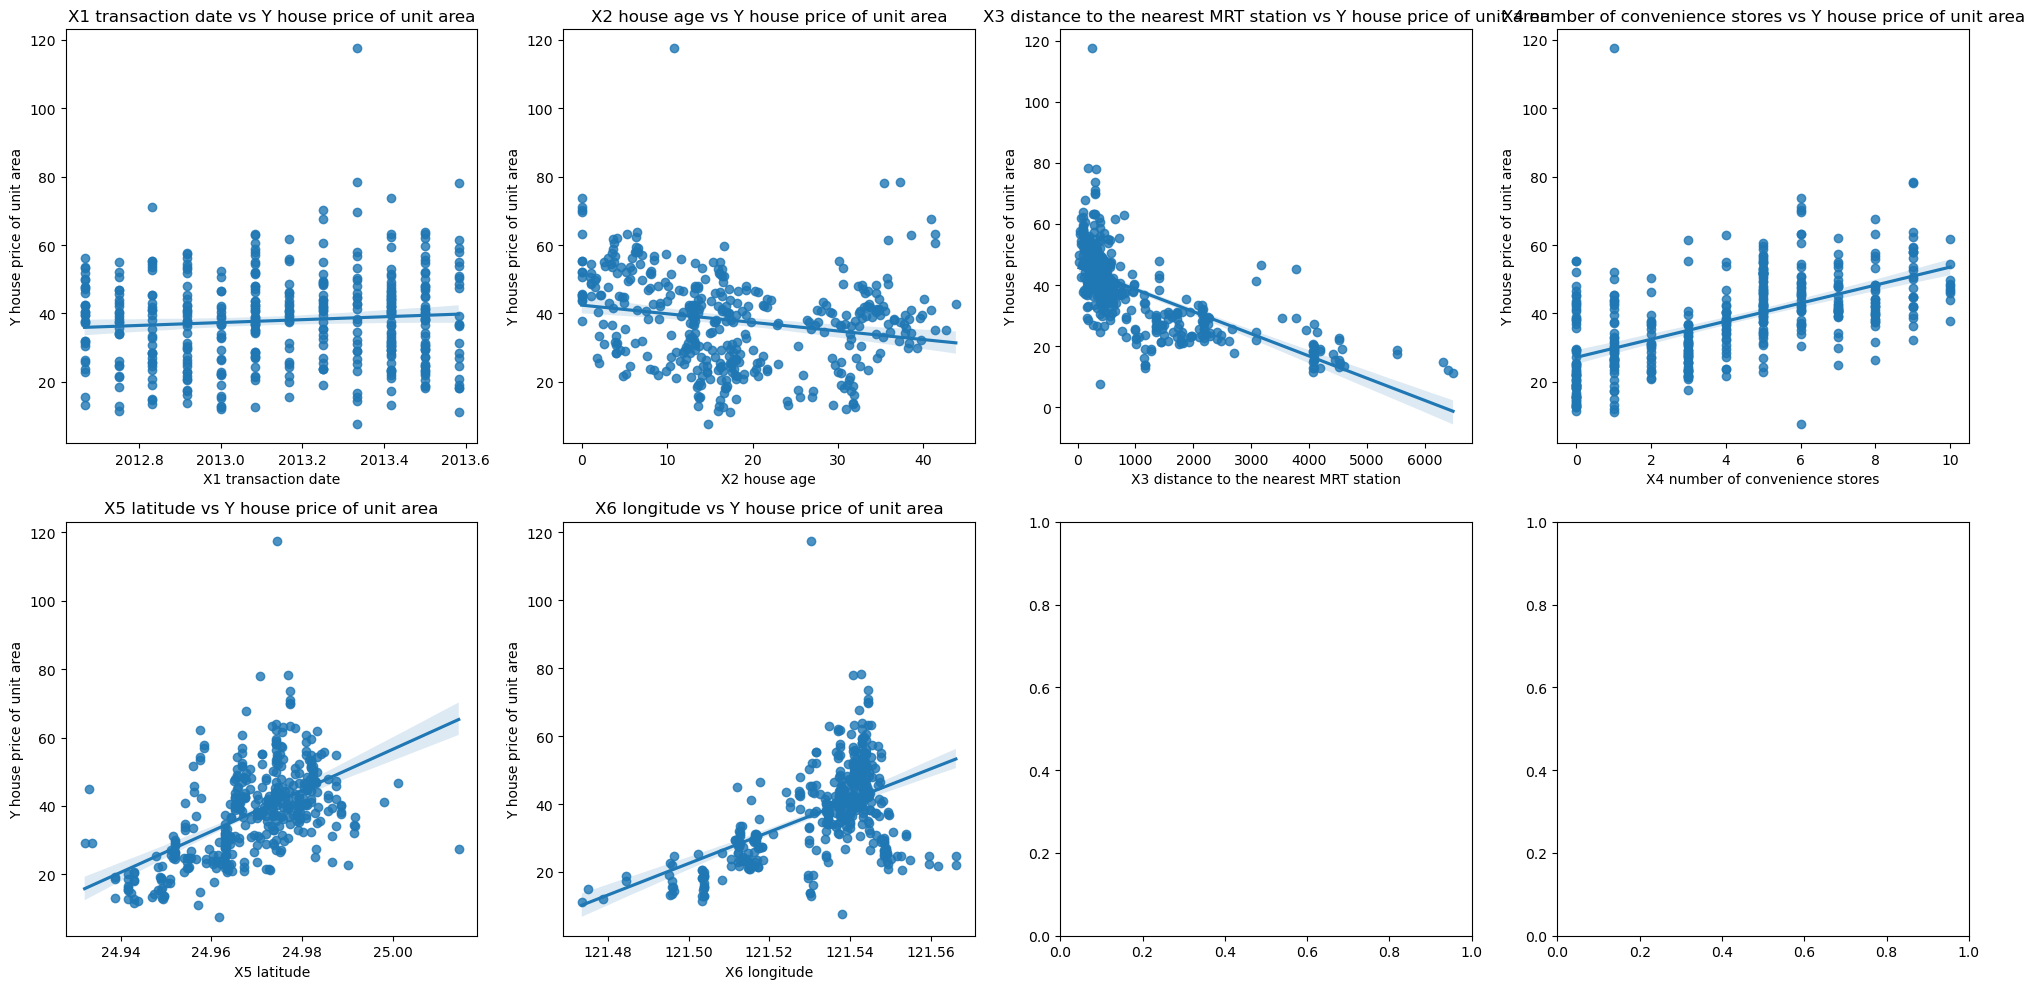

In [70]:
features = ['X1 transaction date', 'X2 house age','X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
target = 'Y house price of unit area'

fig, axes = plt.subplots(2, 4, figsize=(20, 10))  


axes = axes.flatten()

for i, feature in enumerate(features):
    sns.regplot(x=feature, y=target, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs {target}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target)

plt.tight_layout()
plt.show()

We observe that:
* There is a positive linear trend for x5 latitude vs house price, x6 longitiude vs house price, and number of convenience stores vs Y house price.
* This shows that as the feature (x) increases, the target (y) also increases.
* There is a negative linear trend for x3 distance to nearest MRT station vs house price, and a slight negative trend for x2 house age vs house price.
* This shows that as the feature (x) increases, the target (y) decreases.

## 4.0 Linear Regression models

### 4.1 Simple Linear Regression

Simple linear regression involves predicting a target variable based on one independent variable. For example, we will predict Y house price of unit area based on number of convenience stores. The results are visualized using scatterplot and regression line.

Coefficient: 2.577389654571745
Intercept: 27.70822173392014


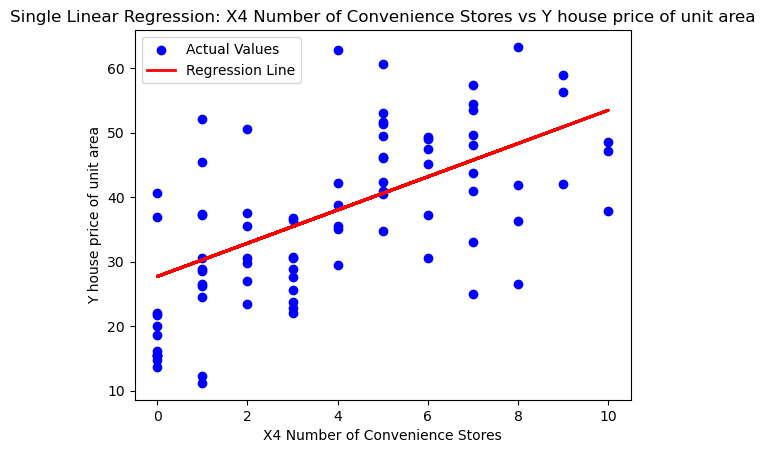

In [71]:
X_single = df[['X4 number of convenience stores']]  # Use only one feature
y_single = df['Y house price of unit area']

# Split the data into training and testing sets (80% train, 20% test)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_single, y_single, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_s, y_train_s)

# Predict on the test data
y_pred_s = model.predict(X_test_s)

# Print the coefficient and intercept
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Visualize the results using a scatterplot
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual Values')
plt.plot(X_test_s, y_pred_s, color='red', linewidth=2, label='Regression Line')
plt.xlabel('X4 Number of Convenience Stores')
plt.ylabel('Y house price of unit area')
plt.title('Single Linear Regression: X4 Number of Convenience Stores vs Y house price of unit area')
plt.legend()
plt.show()

The equation for the regression line is derived from the coefficient (slope) and intercept:

$$Y = 27.71 + 2.58 \times X$$

Intercept (27.71):
* When the number of convenience stores (𝑋=0) is 0, the predicted house price per unit area is approximately 27.71.

Coefficient (2.58):
* For every additional number of convenience stores, the house price per unit area increases by approximately 2.58 units.
* This suggests a positive linear relationship between number of convenience stores and price.

Is this a good fit of data:
* If the blue points are clustered closely around the red line, it indicates a good fit of the model. If the points are widely scattered, the model has lower predictive power.
* Some blue points seemed to be close to the regression line, but there are still many points that are further away from the regression line.
* This probabaly mean that simple linear regression does not provide much predictive power in predicting house prices.

Hence, we will proceed to multiple linear regression.

### 4.2 Multiple Linear Regression

Multiple Linear Regression is an extension of simple linear regression where the model examines the relationship between one dependent variable (or target) and two or more independent variables (or features). It predicts the target variable as a linear combination of the independent variables.



Now, we use all features to predict the house prices. We will use residual plots to visualize the residuals (errors) of a model. The residuals are the differences between the observed actual values (y actual) and the predicted values (y predicted). Positive values for the residual (on the y-axis) mean the prediction was too low, and negative values mean the prediction was too high; 0 means the guess was exactly correct.

$ \text{Residual} = y_{\text{actual}} - y_{\text{predicted}} $s.

To determine whether it is a good residual plot, we can answer the following questions:
* Do the residuals exhibit a clear pattern?
* Do the residuals increase or decrease in variance in a systematic way?



The plot on the actual value on the x-axis and the predicted value on the y-axis graph compares the two plots to see how close the points are. If the actual plot and the predicted values lie around the diagonal line, it means that our model has a good performance in predicting the values.

In [72]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

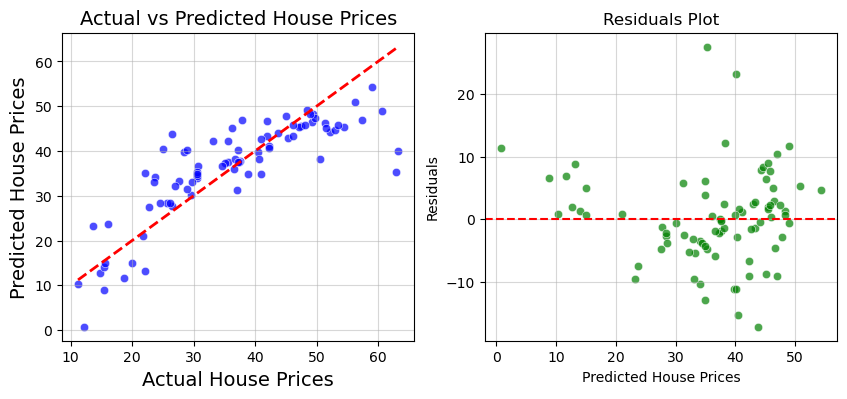

In [73]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="blue")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)

plt.title('Actual vs Predicted House Prices', fontsize=14)
plt.xlabel('Actual House Prices', fontsize=14)
plt.ylabel('Predicted House Prices', fontsize=14)
plt.grid(alpha=0.5)

plt.subplot(1, 2, 2)
residuals = y_test - y_pred


sns.scatterplot(x=y_pred, y=residuals, alpha=0.7, color="green")
plt.axhline(0, color='red', linestyle='--') 
plt.title('Residuals Plot')
plt.xlabel('Predicted House Prices')
plt.ylabel('Residuals')
plt.grid(alpha=0.5)
plt.show()

plt.show()

Actual vs Predicted plot:
* The points are reasonably close to the red dashed line, suggesting the model is moderately effective in predicting house prices.
* However, there is some visible scatter, especially for higher values, which indicates prediction errors (residuals).

Residual plot:
* There are no strong visible patterns, such as curves or clustering, suggesting that the linear regression model is appropriate for the data.
* The residuals have fairly constant variance (i.e. the distance between the residuals and the value zero) at each level of the fitted values, without forming patterns or increasing/decreasing in spread, which means predictions are reliable.

### 4.3 Polynomial Linear Regression

Polynomial Linear Regression is an extension of simple linear regression where the relationship between the independent variable(s) and the dependent variable is modeled as a polynomial of degree greater than one. It allows linear regression to model non-linear relationships by introducing polynomial terms into the equation, while still solving the problem using the linear regression framework.

We will use a polynomial degree of 2 and transform the features into polynomial features.

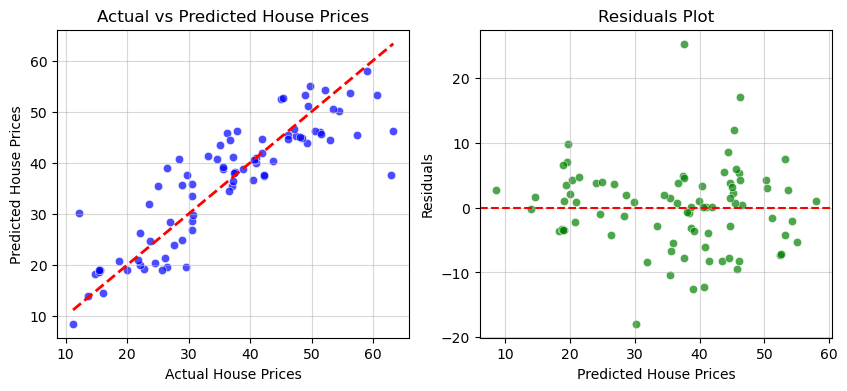

In [74]:

degree = 2  


poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)  

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train_poly, y_train_poly)


y_pred_poly = model.predict(X_test_poly)

# Scatterplot of true vs. predicted values
plt.figure(figsize=(10, 4))
# Subplot 1: Actual vs Predicted scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_poly, y=y_pred_poly, alpha=0.7, color="blue")
#plt.scatter(y_test_poly, y_pred_poly, alpha=0.6, color='b', edgecolor='k')
plt.plot([y_test_poly.min(), y_test_poly.max()], [y_test_poly.min(), y_test_poly.max()], color='r', linestyle='--', linewidth=2)  # 45-degree reference line
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.grid(alpha=0.5)

# Calculate residuals
plt.subplot(1, 2, 2)
residuals = y_test_poly - y_pred_poly
sns.scatterplot(x=y_pred_poly, y=residuals, alpha=0.7, color="green")
plt.axhline(0, color='red', linestyle='--')  # Horizontal line at y=0 (ideal residuals)
plt.title('Residuals Plot')
plt.xlabel('Predicted House Prices')
plt.ylabel('Residuals')
plt.grid(alpha=0.5)
plt.show()
plt.show()



Actual vs Predicted plot:
* The points are reasonably close to the red dashed line, suggesting the model is moderately effective in predicting house prices.
* However, there is still some visible scatter, especially for higher values, which indicates prediction errors (residuals).

Residual plot:
* There are no strong visible patterns, such as curves or clustering, suggesting that the linear regression model is appropriate for the data.
* The residuals have fairly constant variance (i.e. the distance between the residuals and the value zero) at each level of the fitted values, without forming patterns or increasing/decreasing in spread, which means predictions are reliable.

Next, we evaluates how different polynomial degrees affect the model's performance. We test with degree of 3 to 5.

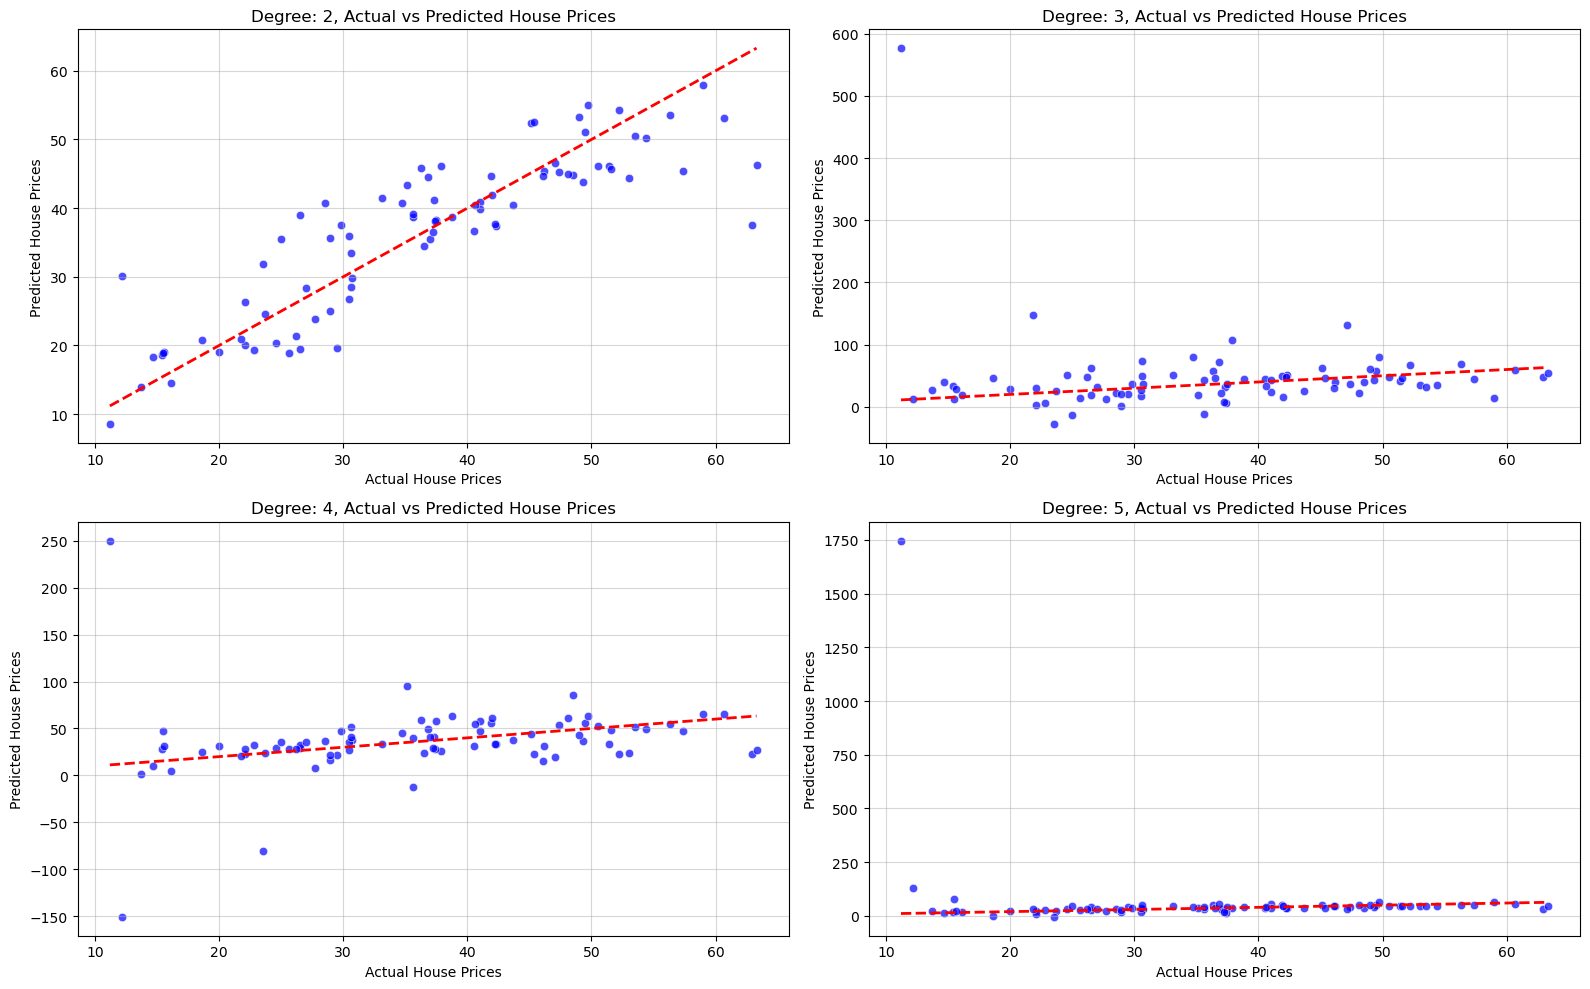

In [75]:
 #Define a range of polynomial degrees to test
degrees = [2, 3, 4, 5]

# Initialize lists to store metrics for each degree
mae_list = []
mse_list = []
r2_list = []
rmse_list =[]

# Create subplots to display results for each degree
plt.figure(figsize=(16, 10))

# Loop through the degrees
for i, degree in enumerate(degrees):
    # Transform the features into polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)  # Transform input features to polynomial features
    
    # Split the data into training and testing sets (80% train, 20% test)
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
        X_poly, y, test_size=0.2, random_state=42
    )
    
    # Initialize the linear regression model
    model = LinearRegression()
    
    # Train the model on the training data
    model.fit(X_train_poly, y_train_poly)
    
    # Predict on the test data
    y_pred_poly = model.predict(X_test_poly)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test_poly, y_pred_poly)
    mse = mean_squared_error(y_test_poly, y_pred_poly)
    rmse = sqrt(mse) 
    r2 = r2_score(y_test_poly, y_pred_poly)

    # Append metrics to the lists
    mae_list.append(mae)
    mse_list.append(mse)
    r2_list.append(r2)
    rmse_list.append(rmse)
    
    # Plot scatterplot
    plt.subplot(2, 2, i + 1)  # 2 rows, 2 columns
    sns.scatterplot(x=y_test_poly, y=y_pred_poly, alpha=0.7, color="blue")
    plt.plot(
        [y_test_poly.min(), y_test_poly.max()],
        [y_test_poly.min(), y_test_poly.max()],
        color='r', linestyle='--', linewidth=2
    )  # 45-degree reference line
    plt.title(f'Degree: {degree}, Actual vs Predicted House Prices')
    plt.xlabel('Actual House Prices')
    plt.ylabel('Predicted House Prices')
    plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

Degree 3:
* The predicted values deviate slightly from the actual values, with some points far from the red dashed line.

Degree 4:
* Some predicted values deviate significantly from the actual values, with points scattered far from the red dashed line.

Degree 5:
* The scatterplot shows some overfitting, with predictions ranging from very low to exceptionally high values (e.g., above 1000).
* This cold be due to the degree of polynomial complexity is too high for the dataset, resulting in poor performance and a lack of meaningful patterns.

Degree 2 appears to provide the best results, with a good balance between capturing the relationship and maintaining generalization.


### 4.4 Advanced Linear Regression using Statmodels

Advanced Linear Regression using Statsmodels refers to performing linear regression analysis using the Python statsmodels library, which is a powerful tool for conducting detailed statistical analysis of data.

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.558
Model:                                    OLS   Adj. R-squared:                  0.550
Method:                         Least Squares   F-statistic:                     68.21
Date:                        Mon, 20 Jan 2025   Prob (F-statistic):           1.46e-54
Time:                                19:08:33   Log-Likelihood:                -1201.2
No. Observations:                         331   AIC:                             2416.
Df Residuals:                             324   BIC:                             2443.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

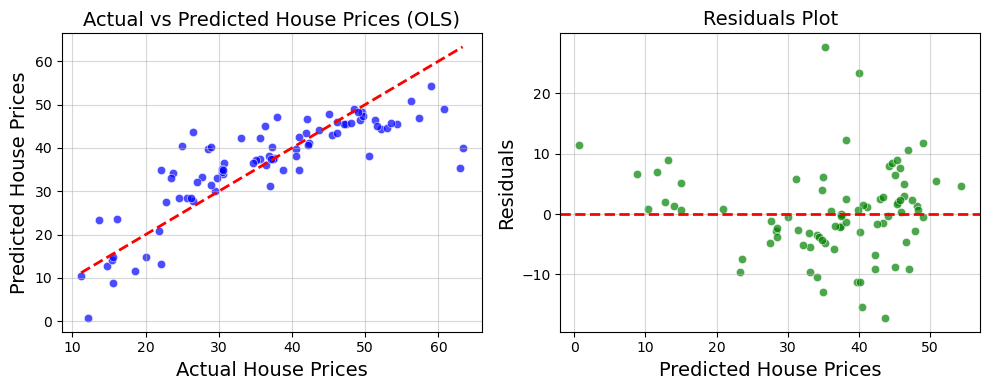

In [76]:

# Add a constant to the features matrix (for the intercept term)
X = sm.add_constant(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the OLS model
model = sm.OLS(y_train_ad, X_train_ad).fit()

# Predict on the test data
y_pred_ad = model.predict(X_test_ad)

# Calculate residuals
residuals = y_test_ad - y_pred_ad

# Display the summary of the model
print(model.summary())

# Create a figure with subplots
plt.figure(figsize=(10, 4))

# Subplot 1: Actual vs Predicted scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_ad, y=y_pred_ad, alpha=0.7, color="blue")
plt.plot([y_test_ad.min(), y_test_ad.max()], [y_test_ad.min(), y_test_ad.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted House Prices (OLS)', fontsize=14)
plt.xlabel('Actual House Prices', fontsize=14)
plt.ylabel('Predicted House Prices', fontsize=14)
plt.grid(alpha=0.5)

residuals = y_test_ad - y_pred_ad

# Subplot 2: Residuals plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_ad, y=residuals, alpha=0.7, color="green")
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Reference line at 0
plt.title('Residuals Plot', fontsize=14)
plt.xlabel('Predicted House Prices', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

X1 transaction date: 
* For each unit increase in the transaction date, house price increases by 5.44 units. Statistically significant as (p < 0.05).
  
X2 house age:
* For each additional year of house age, the house price decreases by 0.27 units. Statistically significant.
  
X3 distance to the nearest MRT station:
* For every additional meter from the nearest MRT station, house price decreases by 0.0048 units. Statistically significant.
  
X4 number of convenience stores:
* Each additional convenience store increases house price by 1.09 units. Statistically significant.
  
X5 latitude:
* A one-unit increase in latitude increases house price by 229.04 units. Statistically significant.
  
X6 longitude:
* Longitude does not significantly affect house price (p > 0.05).

X6 longitude is not statistically significant (p = 0.599). There is not enough evidence to say that longitude has an have a meaningful effect on house prices in this model. The model explains about 55.8% of the variance in house prices, which is slighly less than moderate.

## 5.0 Evaluation 

1. Mean absolute error (MAE): a simple yet powerful metric used to evaluate the accuracy of regression models. It measures the average absolute difference between the predicted values and the actual target values.

$$MAE = \frac{1}{n} \sum_{i=1}^{n} \left| \hat{y}_i - y_i \right|$$

2. Mean squared error (MSE): represents the error of the estimator or predictive model created based on the given set of observations in the sample. It measures the average squared difference between the predicted values and the actual values, quantifying the discrepancy between the model’s predictions and the true observations

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$

3. Root Mean Square Error (RMSE): measures the average difference between a statistical model’s predicted values and the actual values. Mathematically, it is the standard deviation of the residuals. Residuals represent the distance between the regression line and the data points.

$$RSME = \sqrt{\frac{\sum (y_i - \hat{y}_i)^2}{N - P}}$$

4. $R^2$: R-Squared, also known as the coefficient of determination, is another statistical metric used to evaluate the performance of regression models. It measures the proportion of the total variation in the dependent variable (output) that can be explained by the independent variables (inputs) in the model. Mathematically, that can be represented as the ratio of the sum of squares regression (SSR) and the sum of squares total (SST).

$$R^2 = \frac{SSR}{SST} = \frac{\sum (\hat{y}_i - \bar{y})^2}{\sum (y_i - \bar{y})^2}$$


We will calculate the metrics for simple, multiple and polynomial linear regression.

In [77]:
# Calculate metrics for single linear regression
mae = mean_absolute_error(y_test_s, y_pred_s)
mse = mean_squared_error(y_test_s, y_pred_s)
rmse = sqrt(mse)  
r2 = r2_score(y_test_s, y_pred_s)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 8.345510690915427
Mean Squared Error: 101.73839399811925
RMSE: 10.086545196355353
R-squared: 0.3935470378244481


Mean Absolute Error (MAE): 8.35
* This indicates that, on average, the predicted house prices are off by 8.35 units from the actual values.
  
Mean Squared Error (MSE): 101.74
* The average of the squared errors is 101.74.

Root Mean Squared Error (RMSE): 10.08
* A lower RMSE shows the multiple regression model predicts closer to the actual values.
  
R-squared (R²): 0.393
* Only 39.3% of the variability in the house prices is explained by the single feature used in the model. This suggests a weak fit for a simple linear regression.

In [78]:
# Calculate metrics for multiple linear regression
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)  
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 5.3053556900742285
Mean Squared Error: 53.505619124503276
RMSE: 7.314753524521744
R-squared: 0.6810580555095873


Mean Absolute Error (MAE): 5.30
* The average prediction error is much smaller compared to the single linear regression, showing improved accuracy.

Mean Squared Error (MSE): 53.51
* The squared errors are also reduced, indicating a better fit.

Root Mean Squared Error (RMSE): 7.31
* A lower RMSE shows the multiple regression model predicts closer to the actual values.

R-squared (R²): 0.681
* About 68.1% of the variability in the house prices is explained by the multiple linear regression model. This demonstrates a much better model fit compared to the single feature model.


In [79]:
# Loop to print metrics for each degree (polynomial)
for i in range(len(degrees)):
    print(f"Degree {degrees[i]}:")
    print(f"  MAE: {mae_list[i]}")
    print(f"  MSE: {mse_list[i]}")
    print(f"  RMSE: {mse_list[i]}")
    print(f"  R^2: {r2_list[i]}")
    print("-" * 20)

Degree 2:
  MAE: 4.732491421699524
  MSE: 40.869898577146465
  RMSE: 40.869898577146465
  R^2: 0.7563783928377812
--------------------
Degree 3:
  MAE: 24.975676972248472
  MSE: 4556.916074302077
  RMSE: 4556.916074302077
  R^2: -26.163346530681125
--------------------
Degree 4:
  MAE: 18.34027262064348
  MSE: 1416.6516645290667
  RMSE: 1416.6516645290667
  R^2: -7.444526835566727
--------------------
Degree 5:
  MAE: 30.304607194087595
  MSE: 36584.47486159675
  RMSE: 36584.47486159675
  R^2: -217.07660095226697
--------------------


Degree 2:
* MAE (4.73) and MSE (40.87): These values are low, indicating that the model makes relatively accurate predictions.
* RMSE (40.87): The root mean squared error aligns with the MSE and suggests a good fit.
* R² (0.756): This indicates that the model explains about 75.6% of the variability in the data, which is a strong fit.

Degree 3:
* MAE (24.98) and MSE (4556.92): These errors are significantly higher compared to Degree 2, indicating poor predictions.
* RMSE (4556.92): Extremely high, signaling that the model is highly inaccurate.
* R² (-26.16): A negative R² value means the model performs worse than a simple horizontal line (no relationship between predictors and the target).

Degree 4:
* MAE (18.34) and MSE (1416.65): The errors are slightly lower than Degree 3 but still much worse than Degree 2.
* RMSE (1416.65): High values indicate poor predictions.
* R² (-7.44): The negative R² again shows that this model is worse than a simple baseline.

Degree 5:
* MAE (30.30) and MSE (36584.47): The errors increase dramatically, indicating the model is completely failing to predict accurately.
* RMSE (36584.47): The extremely high value reflects large errors.
* R² (-217.08): A highly negative R² demonstrates catastrophic overfitting.

Degree 5 overfits severely and is the worst-performing model.

  

We can evaluate the model performance using k fold cross validation. Validation assesses a model’s performance on unseen data, helping detect overfitting. It ensures the model generalizes well and is not just memorizing the training data.



In [239]:
# Perform 10-Fold Cross-Validation
scores = cross_val_score(LinearRegression(), X, y, cv=10)  
#cross_val_score for regression uses R² as the default score.

# Print the cross-validation scores
print("Cross-validation scores for each fold: ", scores)

# Calculate the mean and standard deviation of the cross-validation scores
#gives the average R² score across all folds in the cross-validation.
print(f"Mean score: {np.mean(scores):.4f}")

Cross-validation scores for each fold:  [0.68400101 0.74744822 0.5951675  0.37619015 0.7095292  0.62160193
 0.30445052 0.59022416 0.60930332 0.58062611]
Mean score: 0.5819


An average R² score of 0.5819, indicating that the model explains about 58.19% of the variance in the target variable. While this suggests moderate predictive power, the scores vary significantly across folds, ranging from 0.3045 to 0.7474. This variability implies that the model performs well on some data subsets but struggles with others, possibly due to differences in data distribution or challenging patterns in certain folds.

## 6.0 Hyperparameter tuning

### 6.1 Ridge and Lasso

Ridge and Lasso are regularization techniques used in linear regression to prevent overfitting by adding a penalty term to the cost function. These penalties control the magnitude of the regression coefficients, effectively tuning the model complexity

We first perform feature scaling, it is necessary to ensure the regularization term penalizes all features fairly.

In [240]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)  # Adjust alpha (regularization strength)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Lasso Regression
lasso = Lasso(alpha=0.1)  # Adjust alpha (regularization strength)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Evaluate models
print("Ridge Regression:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_ridge):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_ridge):.2f}")

print("\nLasso Regression:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_lasso):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_lasso):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_lasso):.2f}")

# Compare Coefficients
print("\nRidge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)


Ridge Regression:
Mean Squared Error (MSE): 53.45
Mean Absolute Error (MAE): 5.30
R² Score: 0.68

Lasso Regression:
Mean Squared Error (MSE): 53.05
Mean Absolute Error (MAE): 5.30
R² Score: 0.68

Ridge Coefficients: [ 0.          1.52280735 -3.05289959 -5.73153862  3.22152936  2.85997262
 -0.39873784]
Lasso Coefficients: [ 0.          1.41602372 -2.94587749 -5.36912365  3.18119421  2.8322564
 -0.        ]


We can use gridsearchCV to tune hyperparameters by specifying different alpha values.

In [241]:
# Define parameter grid for Ridge and Lasso Regression
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0, 100.0]}
param_grid_lasso = {'alpha': [0.01, 0.1, 1.0, 10.0]}

# Initialize Ridge and Lasso models
ridge = Ridge()
lasso = Lasso()

# Initialize GridSearchCV for Ridge
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train_scaled, y_train)

# Initialize GridSearchCV for Lasso
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the best models
best_ridge = grid_search_ridge.best_estimator_
best_lasso = grid_search_lasso.best_estimator_

# Predict using the best models
y_pred_ridge = best_ridge.predict(X_test_scaled)
y_pred_lasso = best_lasso.predict(X_test_scaled)

# Evaluate Ridge model
print("Ridge Regression (Best Model):")
print(f"Best alpha: {grid_search_ridge.best_params_['alpha']}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_ridge):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_ridge):.2f}")

# Evaluate Lasso model
print("\nLasso Regression (Best Model):")
print(f"Best alpha: {grid_search_lasso.best_params_['alpha']}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_lasso):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_lasso):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_lasso):.2f}")

Ridge Regression (Best Model):
Best alpha: 10.0
Mean Squared Error (MSE): 53.08
Mean Absolute Error (MAE): 5.30
R² Score: 0.68

Lasso Regression (Best Model):
Best alpha: 0.1
Mean Squared Error (MSE): 53.05
Mean Absolute Error (MAE): 5.30
R² Score: 0.68


The results showed models rebuild after gridsearchCV. We can see that it shows improvements in MSE for ridge.